In [1]:
from scipy.integrate import odeint
import numpy as np
import pandas as pd
from pandas import read_excel
from scipy.optimize import curve_fit
%matplotlib inline
# from cycler import cycler
import math
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import integrate,optimize, fftpack

In [2]:
cases=pd.read_excel('Nl_Ger.xlsx')
cases.replace(np.NaN,0)
nedgov = pd.read_csv('NED_GOV.csv', sep=',')
gergov = pd.read_csv('GER_GOV.csv', sep=',')

gercases = cases.iloc[0:293,7]/83
nedcases = cases.iloc[299:592,7]/17
dates = cases.iloc[0:293,3]

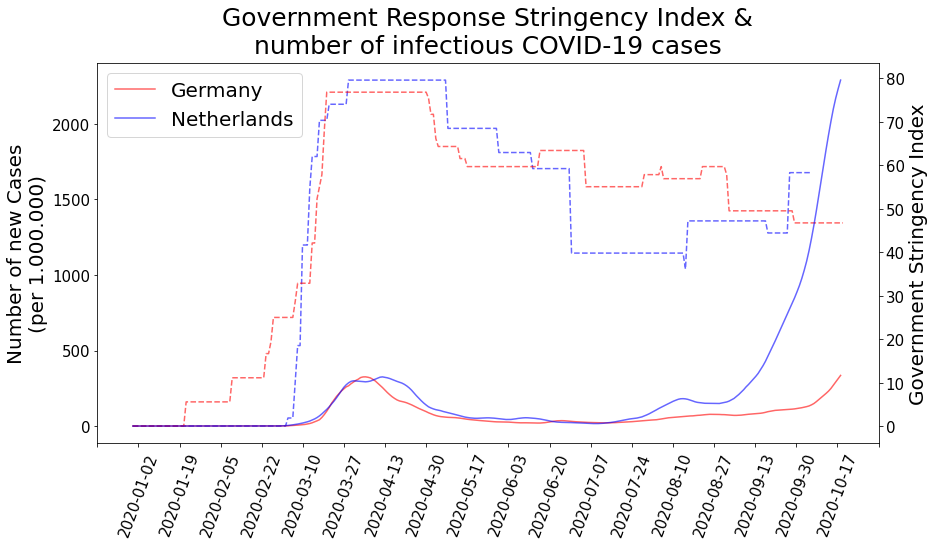

In [3]:
fig = plt.figure(figsize = (14,7))
ax=fig.add_subplot(111, label="1")
ax.plot(nedgov['2020-01-01'],nedgov['0'],'b--',label = "Netherlands", alpha = 0.6)
ax.plot(gergov['2020-01-01'],gergov['0'],'r--',label = "Germany", alpha = 0.6)
ax.set_ylabel("Government Stringency Index", size = 20)
ax2 = fig.add_subplot(111, label ="2", frame_on = False)
ax2.plot(dates,gercases,'r', label = "Germany", alpha = 0.6)
ax2.plot(dates,nedcases,'b', label = "Netherlands", alpha = 0.6)
ax2.set_ylabel("Number of new Cases\n(per 1.000.000)", size = 20)
# ax.set_xlabel("Date", size = 20)
ax2.yaxis.set_label_position('left')
ax.yaxis.set_label_position('right')
# ax2.set_xticks([])
ax.set_xticks([])
ax2.legend(fontsize = 20, loc = "upper left")

ax.yaxis.tick_right()
for tick in ax2.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)
for tick in ax.yaxis.get_major_ticks():
    tick.label2.set_fontsize(15)
for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
xmin, xmax = ax.get_xlim()
plt.title("Government Response Stringency Index &\nnumber of infectious COVID-19 cases", size = 25, y=1.01)
plt.xticks(np.round(np.linspace(xmin,xmax,20),2), rotation=70)
plt.show()

In [4]:
file_name = 'Nl_Ger.xlsx'
COVID = read_excel(file_name)

COVID_NL = COVID[(COVID.location == "Netherlands")]
COVID_GER= COVID[(COVID.location == "Germany")]

0.0 294.0


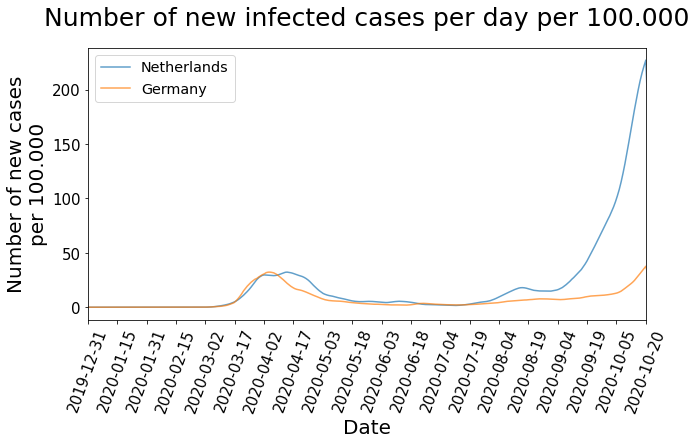

In [5]:
fig, (ax2) = plt.subplots(1, sharex=True, figsize = (10, 5))
plt.plot(COVID_NL["date"], COVID_NL["total_infected"]/COVID_NL["population"]*100000, alpha=0.7, label = 'Netherlands')
for tick in ax2.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)
for tick in ax2.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
plt.plot(COVID_GER["date"], COVID_GER["total_infected"]/COVID_GER["population"]*100000, alpha=0.7, label ='Germany')
ax2.set_xlim(0, 294)
plt.legend(loc = "upper left", fontsize = "x-large")
plt.title("Number of new infected cases per day per 100.000", size = 25, y = 1.06)
plt.xlabel('Date', size = 20)
plt.xticks(rotation=70)
plt.ylabel('Number of new cases\nper 100.000', size = 20)
xmin, xmax = ax2.get_xlim()
print(xmin, xmax)
ax2.set_xticks(np.round(np.linspace(xmin, xmax, 20), 2))

plt.show()

In [6]:
N = 17000000
I0 = 1/N
R0 = 0/N
E0 = 0
S0 = (1 - I0 - R0)

beta = 0.5  #Rate of infection
t = np.linspace(0, 365, 800)   
gamma = 1/5

def deriv(y, t, N, beta):
    S, I, R = y
    dSdt = - S*I*beta
    dIdt = + S*I*beta - gamma*I
    dRdt = + gamma*I
    return dSdt, dIdt, dRdt

y0 = S0, I0, R0
ret = odeint(deriv, y0, t, args=(N, beta))
S, I, R = ret.T

2020-07-16
2020-08-17
A total of : 32 days
(0.99700097823894, 2.135160266434423e-05, 0.002977670158395688)
[0.27470333]


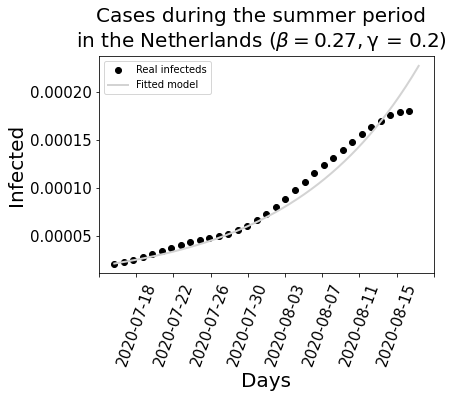

R0 is: beta/gamma = 1.37352


In [7]:
idxbegin = np.where(COVID_GER['date']== "2020-07-16")[0][0]
idxend = np.where(COVID_GER['date']== "2020-08-17")[0][0]
print(COVID_GER["date"][idxbegin])
print(COVID_GER["date"][idxend])
print("A total of : " + str(idxend-idxbegin) + " days")

dif = idxend - idxbegin
daysnel = range(0, idxend - idxbegin)
ydatanel = COVID_NL["total_infected"]/COVID_NL["population"]
Recovered = COVID_NL["Recovered"]/COVID_NL["population"]
Recovered = Recovered[idxbegin:idxend]
Recovered = np.array(Recovered, dtype = float)
# print(Recovered)
Exposed = COVID_NL["Exposed"]/COVID_NL["population"]
Exposed = Exposed[idxbegin:idxend]
Exposed = np.array(Exposed, dtype = float)
ydatanel = ydatanel[idxbegin:idxend]
ydatanel = np.array(ydatanel, dtype = float)
xdatanel = np.array(daysnel, dtype = float)

recnel = COVID_NL["Recovered"]/COVID_NL["population"]
recnel = recnel[idxbegin:idxend]
recnel = np.array(recnel, dtype = float)
N = 17134873
I0 = ydatanel[0]
R0 = Recovered[0]
# E0 = Exposed[0]
S0 = 1 - I0 - R0 

y0 = S0, I0, R0
# print(y0)
tspacenel = np.linspace(0,dif,500)

def fit_odeint(x, beta):
    return odeint(deriv, y0, x, args=(N, beta))[:,1]

poptnel, pcovnel = curve_fit(fit_odeint, xdatanel, ydatanel)
print(poptnel)
#fitted = fit_odeint(np.linspace(1,15,200), *popt)
retnel = odeint(deriv, y0, tspacenel, args=(N, *poptnel))
Snel, Inel, Rnel = retnel.T
betanel = poptnel

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(COVID_GER["date"][idxbegin:idxend], ydatanel, 'ro', label='Real infecteds', color='black')
#ax.plot(tboys, fitted, color='Green', linewidth=2, label='Infected boys')
ax.plot(tspacenel, Inel, color='lightgray', linewidth=2, label='Fitted model')
ax.set_xlabel('Days', size = 20)
ax.set_ylabel('Infected', size = 20)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
#ax.set_ylim(0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
xmin, xmax = ax.get_xlim()
ax.set_xticks(np.round(np.linspace(xmin, xmax, 10), 2))
plt.xticks(rotation=70)
fig.suptitle('Cases during the summer period\nin the Netherlands ($\N{greek small letter beta} ='
             + str(round(betanel[0],2)) +  ", $\N{greek small letter gamma} = " + str(gamma) + ")",
             fontsize=20, y= 1.05)
plt.show()
print("R0 is: beta/gamma =", round(betanel[0]/gamma, 5))

2020-07-17
2020-08-05
A total of : 19 days
[0.23775804]


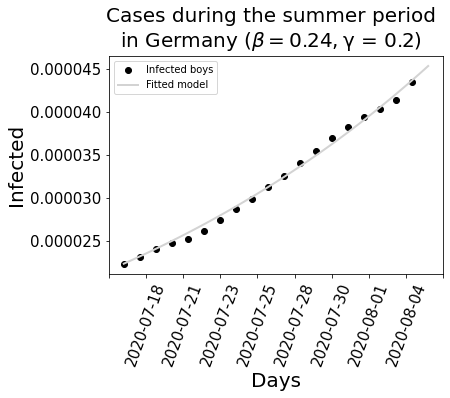

R0 is: beta/gamma = 1.19


In [8]:
idxbegin = np.where(COVID_GER['date']== "2020-07-17")[0][0]
idxend = np.where(COVID_GER['date']== "2020-08-05")[0][0]
print(COVID_GER["date"][idxbegin])
print(COVID_GER["date"][idxend])
print("A total of : " + str(idxend-idxbegin) + " days")

dif = idxend - idxbegin
daysger = range(0, idxend - idxbegin)
ydatager = COVID_GER["total_infected"]/COVID_GER["population"]
Recovered = COVID_GER["Recovered"]/COVID_GER["population"]
Recovered = Recovered[idxbegin:idxend]
Recovered = np.array(Recovered, dtype = float)

Exposed = COVID_GER["Exposed"]/COVID_GER["population"]
Exposed = Exposed[idxbegin:idxend]
Exposed = np.array(Exposed, dtype = float)
ydatager = ydatager[idxbegin:idxend]
ydatager = np.array(ydatager, dtype = float)
# print(ydatager)
xdatager = np.array(daysger, dtype = float)
# recger = COVID_GER["Recovered"]/COVID_GER["population"]
# recger = recger[idxbegin:idxend]
# recger = np.array(recger, dtype = float)

N = 83783945
I0 = ydatager[0]
E0 = Exposed[0]
R0 = Recovered[0]
S0 = 1 - I0 - R0
y0 = S0, I0, R0
tspaceger = np.linspace(0,dif,100)


def fit_odeint(x, beta):
    return odeint(deriv, y0, x, args=(N, beta))[:,1]

poptger, pcovger = curve_fit(fit_odeint, xdatager, ydatager)
print(poptger)
#fitted = fit_odeint(np.linspace(1,15,200), *popt)
retger = odeint(deriv, y0, tspaceger, args=(N, *poptger))
Sger, Iger, Rger = retger.T
betager = poptger

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(COVID_GER["date"][idxbegin:idxend], ydatager, 'ro', label='Infected boys', color='black')
#ax.plot(tboys, fitted, color='Green', linewidth=2, label='Infected boys')
ax.plot(tspaceger, Iger, color='lightgray', linewidth=2, label='Fitted model')
ax.set_xlabel('Days', size = 20)
ax.set_ylabel('Infected', size = 20)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
# ax.ticklabel_format(useOffset=False)
ax.ticklabel_format(axis='y', style='plain')
# plt_ticklabel_format('y', style = 'plain')
#ax.set_ylim(0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
xmin, xmax = ax.get_xlim()
ax.set_xticks(np.round(np.linspace(xmin, xmax, 10), 2))
plt.xticks(rotation=70)
fig.suptitle('Cases during the summer period\nin Germany ($\N{greek small letter beta} ='
             + str(round(betager[0],2)) +  ", $\N{greek small letter gamma} = " + str(gamma) + ")",
             fontsize=20, y= 1.05)
plt.show()
print("R0 is: beta/gamma =", round(betager[0]/gamma, 2))